# Logistic Regression

In [87]:
# Data Pre-processing
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# Importing dataset
dataset = pd.read_csv("C:/Users/Mishaal/Desktop/customer.csv")
X = dataset.iloc[:, 2:4].values
Y = dataset.iloc[:, 4].values

In [89]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs') #solver is an optimization alogrithm
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [13]:
var_prob = classifier.predict_proba(X_test)
var_prob

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747],
       [0.91056209, 0.08943791],
       [0.90253903, 0.09746097],
       [0.99212979, 0.00787021],
       [0.9848589 , 0.0151411 ],
       [0.26779092, 0.73220908],
       [0.99419108, 0.00580892],
       [0.49579544, 0.50420456],
       [0.96395406, 0.03604594],
       [0.97081333, 0.02918667],
       [0.83936154, 0.16063846],
       [0.63040685, 0.36959315],
       [0.98450737, 0.01549263],
       [0.66506265, 0.33493735],
       [0.72016534, 0.27983466],
       [0.98774666, 0.01225334],
       [0.01139953, 0.98860047],
       [0.95799724, 0.04200276],
       [0.91070984, 0.08929016],
       [0.03668135, 0.96331865],
       [0.72304389, 0.27695611],
       [0.11787963, 0.88212037],
       [0.99551213, 0.00448787],
       [0.02704431, 0.97295569],
       [0.92232099, 0.07767901],
       [0.92371914, 0.07628086],
       [0.80661256, 0.19338744],
       [0.84341507, 0.15658493],
       [0.

In [15]:
var_prob[0,:]

array([0.88725351, 0.11274649])

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred) #actual vs predicted

In [19]:
print(cm) 

[[65  3]
 [ 8 24]]


# KNN

In [ ]:
#Data pre-processing steps are same as done above as we are applying KNN on the same dataset

In [25]:
# Fitting k-NN to Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 means we are using euclidean distance
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [28]:
var_prob = classifier.predict_proba(X_test)
var_prob

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. ,

In [48]:
var_prob1 = var_prob[:, 1]
auc = roc_auc_score(Y_test,var_prob1)
print('AUC: %.2f' % auc)

AUC: 0.96


UC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms particularly in the cases where we have imbalanced datasets.

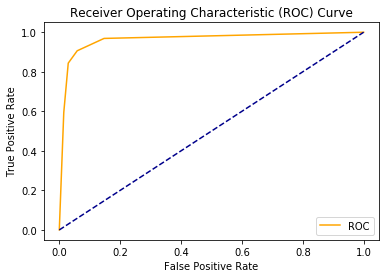

In [50]:
fpr, tpr, thresholds = roc_curve(Y_test, var_prob1)
plot_roc_curve(fpr, tpr)

In [29]:
var_prob[0, :]

array([1., 0.])

In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [31]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

In [32]:
(tn, fp, fn, tp)

(64, 4, 3, 29)

# Support Machine Vector

In [ ]:
#Data pre-processing steps are same as done above as we are applying KNN on the same dataset

In [53]:
# Fitting SVM to Training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear',probability=True, random_state=0) # linear kernel is used when data is linearly separable
classifier.fit(X_train, Y_train)

# Predicting Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [54]:
var_prob = classifier.predict_proba(X_test)
var_prob

array([[0.8791296 , 0.1208704 ],
       [0.8439461 , 0.1560539 ],
       [0.80084143, 0.19915857],
       [0.90697199, 0.09302801],
       [0.90946968, 0.09053032],
       [0.99363888, 0.00636112],
       [0.98791111, 0.01208889],
       [0.2071604 , 0.7928396 ],
       [0.99424335, 0.00575665],
       [0.52158417, 0.47841583],
       [0.96599899, 0.03400101],
       [0.97192263, 0.02807737],
       [0.84699105, 0.15300895],
       [0.6195891 , 0.3804109 ],
       [0.98320203, 0.01679797],
       [0.61501844, 0.38498156],
       [0.71206926, 0.28793074],
       [0.98681972, 0.01318028],
       [0.00856522, 0.99143478],
       [0.96451167, 0.03548833],
       [0.91811831, 0.08188169],
       [0.02625805, 0.97374195],
       [0.7372989 , 0.2627011 ],
       [0.10101049, 0.89898951],
       [0.9962655 , 0.0037345 ],
       [0.01953215, 0.98046785],
       [0.91660387, 0.08339613],
       [0.92034298, 0.07965702],
       [0.81073945, 0.18926055],
       [0.83313057, 0.16686943],
       [0.

In [ ]:
# var_prob2 = var_prob[:, 1]
auc = roc_auc_score(Y_test,var_prob2)
print('AUC: %.2f' % auc)

# Naive Bayes 

In [61]:
# Fitting Naive Bayes Algorithm to Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predicting Test set results
Y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

# Decision Tree

In [66]:
#Feature scaling not required
# Fitting Decision Tree to Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

# Predicting Test set results
Y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

In [67]:
from sklearn import tree

[Text(166.32692307692307, 209.07692307692307, 'X[0] <= 44.5\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(87.99230769230769, 192.35076923076923, 'X[1] <= 90500.0\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(38.63076923076923, 175.62461538461537, 'X[0] <= 36.5\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(30.046153846153846, 158.89846153846153, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(47.215384615384615, 158.89846153846153, 'X[1] <= 67500.0\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(38.63076923076923, 142.1723076923077, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(55.8, 142.1723076923077, 'X[1] <= 83500.0\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(47.215384615384615, 125.44615384615385, 'X[1] <= 70500.0\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(38.63076923076923, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(55.8, 108.72, 'X[1] <= 78500.0\nentropy = 0.592\nsampl

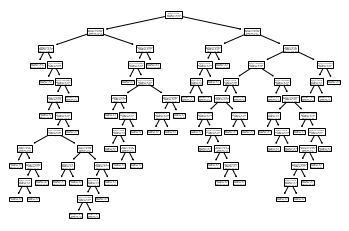

In [68]:
tree.plot_tree(classifier)

In [71]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.91


# Random Forest

In [90]:
# Fitting Random Forest Classification to Training set
from sklearn.ensemble import RandomForestClassifier
classifier  = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

# Predicting Test set results
Y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[63,  5],
       [ 3, 29]], dtype=int64)